1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
import numpy as np
import pandas as pd
batting =  pd.read_csv('batting.csv')

2)Print out the dimensions and info about the dataframe you just created

In [3]:
batting.shape

(102816, 25)

In [4]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [5]:
len(batting[batting['HR']>=40])

326

4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [13]:
#batting.assign(name = df.apply(' '.join, axis = 1)).drop(['first name', 'last name'], axis = 1)
#batting['Name'] = batting['nameLast']+' '+batting['nameFirst']#combine the columns 'nameLast' and 'nameFirst' into one column 'Name'
batting_by_Name = batting.groupby(['nameFirst','nameLast'],as_index=False) #group by the colume by column 'Name'
batting_SumofHR = batting_by_Name.sum()
batting_SumofHR1=batting_SumofHR[batting_SumofHR['HR']>=600]#Find how many players have hit 600 or more HRs in their career
batting_SumofHR1[['nameFirst','nameLast','HR']].reset_index(drop=True)
#isinstance(batting_SumofHR1[['HR']],pd.DataFrame)

,nameFirst,nameLast,HR
0,Alex,Rodriguez,696
1,Babe,Ruth,714
2,Barry,Bonds,762
3,Frank,Thomas,807
4,Hank,Aaron,755
5,Jim,Thome,612
6,Ken,Griffey,782
7,Sammy,Sosa,609
8,Willie,Mays,660


5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [14]:
batting5 = batting[(batting['2B']>=40) & (batting['3B']>=10)& (batting['H']>=200) & (batting['HR']>=30)]
batting5['playerID'].nunique()

11

6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [15]:
batting6 = batting[batting['SB']>=100][['nameFirst','nameLast','yearID','SB']]
batting6.sort_values(by='SB',ascending=False).reset_index(drop=True)

,nameFirst,nameLast,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,John,Ward,1887,111.0
6,Billy,Hamilton,1889,111.0
7,Billy,Hamilton,1891,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [16]:
batting_1960s = batting[(batting['yearID']>=1960) & (batting['yearID']<=1969)]
batting_1960s = batting_1960s.groupby(['nameFirst','nameLast'],as_index = False).sum()
batting_1960s_HR = batting_1960s[batting_1960s['HR']>=200]
batting_1960s_HR[['nameFirst','nameLast','HR']].sort_values(by='HR',ascending=False).reset_index(drop=True)

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [17]:
max_HR = batting_SumofHR['HR'].max()
Most_HR = batting_SumofHR[batting_SumofHR['HR']== max_HR][['nameFirst','nameLast','HR']].reset_index(drop=True)
print(Most_HR)
#isinstance(Most_HR, pd.DataFrame)

  nameFirst nameLast   HR
0     Frank   Thomas  807


9)	Who had the most hits (H) in the 1970s? (Dataframe)

In [18]:
batting_1970s = batting[(batting['yearID']>=1970) & (batting['yearID']<=1979)]
batting_1970s = batting_1970s.groupby(['nameFirst','nameLast'],as_index = False).sum()
max_H_1970s = batting_1970s['H'].max()
most_H_1970s = batting_1970s[batting_1970s['H']==max_H_1970s][['nameFirst','nameLast','H']].reset_index(drop=True)
print(most_H_1970s)
#isinstance(most_H_1970s,pd.DataFrame)

  nameFirst nameLast     H
0      Pete     Rose  2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
(Dataframe, first name, last name, OBP, ordered descending by OBP)

In [19]:
batting_nona = batting.dropna()
batting_nona = batting_nona.copy()
batting_nona['PA'] =  batting_nona['AB'] + batting_nona['BB'] + batting_nona['HBP'] + batting_nona['SH'] + batting_nona['SF'] 
batting_1977_500PA = batting_nona[(batting_nona['yearID']==1977)&(batting_nona['PA'] >= 500)]
batting_1977_500PA = batting_1977_500PA.copy()
batting_1977_500PA['OBP'] = (batting_1977_500PA['H'] + batting_1977_500PA['BB'] + batting_1977_500PA['HBP'])/(batting_1977_500PA['AB'] + batting_1977_500PA['BB'] + batting_1977_500PA['HBP']+ batting_1977_500PA['SF'])
batting_1977_500PA_sorted = batting_1977_500PA.sort_values(by='OBP',ascending = False)[['nameFirst','nameLast','OBP']].reset_index(drop=True)
batting_1977_500PA_sorted.iloc[0:5]

,nameFirst,nameLast,OBP
0,Rod,Carew,0.448773
1,Ken,Singleton,0.437788
2,Reggie,Smith,0.426910
3,Mike,Hargrove,0.420312
4,Joe,Morgan,0.417054


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [20]:
batting_2013_300PA = batting_nona[(batting_nona['yearID']==2013) & (batting_nona['PA']>=300)]
batting_2013_300PA = batting_2013_300PA.copy()
batting_2013_300PA['AVG'] = batting_2013_300PA['H']/batting_2013_300PA['AB']
batting_2013_300PA_sorted = batting_2013_300PA.sort_values(by='AVG', ascending =False)[['nameFirst','nameLast','AVG']].reset_index(drop=True)
batting_2013_300PA_sorted.iloc[0:8]

,nameFirst,nameLast,AVG
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [21]:
batting_1940s = batting[(batting['yearID']>=1940) & (batting['yearID']<=1949)]
batting_1940s = batting_1940s.groupby(['nameFirst','nameLast'],as_index=False).sum()
batting_1940s = batting_1940s[['nameFirst','nameLast','H']]
batting_1940s.sort_values(by='H',ascending=False).reset_index(drop=True).iloc[0:10]

,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407
5,Tommy,Holmes,1402
6,Luke,Appling,1376
7,Bill,Nicholson,1328
8,Marty,Marion,1310
9,Phil,Cavarretta,1304


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [22]:
batting_year = batting.groupby(by='yearID',as_index=False).agg({'H':'max'})
batting_max = pd.merge(batting,batting_year,on=['yearID','H'])[['nameFirst','nameLast','yearID','H']]
batting_max.groupby(by=['nameFirst','nameLast'],as_index=False).agg({'H':'count'}).sort_values(by='H',ascending=False).reset_index(drop=True).iloc[0:3]

,nameFirst,nameLast,H
0,Ichiro,Suzuki,7
1,Pete,Rose,7
2,Ty,Cobb,7


14)	 Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe


In [23]:
batting_games = batting[['nameFirst','nameLast','G']]
batting_games.groupby(['nameFirst','nameLast'],as_index = True).agg({'G':'sum'}).sort_values(by='G',ascending=False).iloc[0:5]

,,G
nameFirst,nameLast,
Ken,Griffey,4768
Frank,Thomas,4088
Jose,Cruz,3741
George,Burns,3719
Pete,Rose,3573


15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [24]:
batting_by_playerID = batting.groupby('playerID',as_index=False).agg({'H':'sum','HR':'sum'})
batting_by_playerID[(batting_by_playerID['H']>=3000) & (batting_by_playerID['HR']>=500)].shape[0]

5

16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [25]:
batting[batting['yearID']==1988]['HR'].sum()

3180

17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [26]:
batting_WB = batting[(batting['nameFirst']=='Wade') & (batting['nameLast']=='Boggs')]
batting_WB = batting_WB[batting_WB['AB']>=500]
batting_WB['AVG'] = batting_WB['H']/batting_WB['AB']
batting_WB.sort_values(by='AVG',ascending=False)[['nameFirst','nameLast','AVG']].reset_index(drop=True).iloc[0:3]

,nameFirst,nameLast,AVG
0,Wade,Boggs,0.367534
1,Wade,Boggs,0.366438
2,Wade,Boggs,0.362976


18) Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [27]:
batting_1995 = batting_nona[(batting_nona['yearID']==1995) & (batting_nona['PA']>=400)]
batting_1995 = batting_1995.copy()
batting_1995['OBP'] = (batting_1995['H'] + batting_1995['BB'] + batting_1995['HBP'])/(batting_1995['AB'] + batting_1995['BB'] + batting_1995['HBP']+ batting_1995['SF'])
batting_1995[['nameFirst','nameLast','OBP']].sort_values('OBP', ascending=False).reset_index(drop=True).iloc[0:10]

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [28]:
batting_4years = batting[(batting['yearID'] == 1922)|(batting['yearID'] == 1925)|(batting['yearID'] == 1926)|(batting['yearID'] == 1928)]
batting_4years.groupby(by=['nameFirst','nameLast'],as_index=True).agg({'3B':'sum'}).sort_values('3B',ascending=False).iloc[0]


3B    59
Name: (Curt, Walker), dtype: int64

20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [29]:
len(batting[(batting['HR']>=30) & (batting['SB']>=30) ].drop_duplicates('playerID'))

37

21)	 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [30]:
batting_1986 = batting_nona[(batting_nona['yearID']==1986) & (batting_nona['AB']>=400)]
batting_1986 = batting_1986.copy()
batting_1986['OBP'] = (batting_1986['H'] + batting_1986['BB'] + batting_1986['HBP'])/(batting_1986['AB'] + batting_1986['BB'] + batting_1986['HBP']+ batting_1986['SF'])
batting_1986[['nameFirst','nameLast','OBP']].sort_values('OBP', ascending=False).reset_index(drop=True).iloc[0]

nameFirst       Wade
nameLast       Boggs
OBP          0.45283
Name: 0, dtype: object

22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [31]:
batting_1997 = batting_nona[(batting_nona['yearID']==1997) & (batting_nona['lgID']=='NL')]
batting_1997 = batting_1997.copy()
batting_1997['OBP'] = (batting_1997['H'] + batting_1997['BB'] + batting_1997['HBP'])/(batting_1997['AB'] + batting_1997['BB'] + batting_1997['HBP']+ batting_1997['SF'])
batting_1997[['nameFirst','nameLast','OBP']].sort_values('OBP', ascending=False).reset_index(drop=True).iloc[0]

nameFirst    Richie
nameLast      Lewis
OBP               1
Name: 0, dtype: object

23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [32]:
batting_2012 = batting_nona[(batting_nona['yearID']==2012)]
batting_2012AB = batting_2012[batting_2012['AB']>=500]
avghr2012 = batting_2012AB['HR'].mean()
batting_2012AB[batting_2012AB['HR']>avghr2012][['nameFirst','nameLast','HR']].sort_values('HR',ascending=False).reset_index(drop=True)

,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Josh,Hamilton,43
2,Curtis,Granderson,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Adam,LaRoche,33


24)	 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [33]:
batting_HR = batting[batting['HR']>=50][['nameFirst','nameLast','birthYear','yearID','HR']]
batting_HR['Age'] = batting_HR['yearID']-batting_HR['birthYear']
youngest_player = batting_HR.sort_values(by='Age').iloc[0]
pd.DataFrame(youngest_player).transpose().reset_index(drop=True)[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
0,Prince,Fielder,50,2007


25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [34]:
batting['Age'] = batting['yearID']-batting['birthYear']
#batting_25 = batting[['nameFirst','nameLast','yearID','HR','Age']]
batting_25 = batting[['playerID','yearID','HR','Age']]
batting_25 = batting_25.copy()
#batting_25['HR_CUM'] = batting_25.groupby(['nameFirst','nameLast'])['HR'].transform(pd.Series.cumsum)
#batting_25 = batting_25[batting_25['HR_CUM']>=300]
#batting_25 = batting_25.groupby(['nameFirst','nameLast']).first()
batting_25['HR_CUM'] = batting_25.groupby(['playerID'])['HR'].transform(pd.Series.cumsum)
batting_25 = batting_25[batting_25['HR_CUM']>=300]
batting_25 = batting_25.groupby(['playerID']).first()
batting_name = batting[['playerID','nameFirst','nameLast']].drop_duplicates()
batting_25 = pd.merge(batting_name,batting_25,on='playerID',how='right')
batting_25.sort_values(by='Age').iloc[0:5].reset_index(drop=True)[['nameFirst','nameLast','yearID','Age']]

,nameFirst,nameLast,yearID,Age
0,Albert,Pujols,2008,28
1,Jimmie,Foxx,1935,28
2,Mel,Ott,1937,28
3,Andruw,Jones,2005,28
4,Alex,Rodriguez,2003,28


26) BONUS:  Graph total HRs per season using bar graph

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

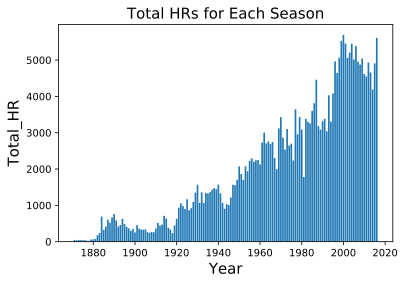

In [36]:
batting_HR = batting.groupby('yearID',as_index=False).agg({'HR':'sum'})
yearID = batting_HR['yearID']
HR = batting_HR['HR']
plt.bar(yearID,HR)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total_HR',fontsize=15)
plt.title('Total HRs for Each Season',fontsize=15)
plt.show()
#sns.distplot(batting_HR['HR'],kde=False,bins=1)
#sns.distplot(HR,bins=1,kde=False, rug=True)

27) (Using a line graph) please graph the average HRs per AB (think about this) per season

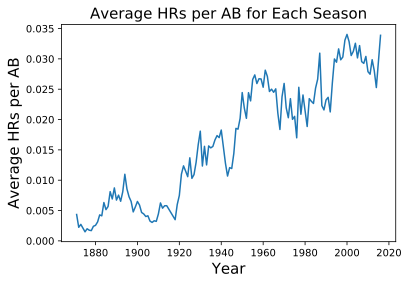

In [38]:
batting27=batting.groupby(['yearID']).agg({'HR':'sum','AB':'sum'}).reset_index()
batting27['AVGHR']=batting27['HR']/batting27['AB']
yearID = batting27['yearID']
AVGHR = batting27['AVGHR']
plt.plot(yearID,AVGHR)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average HRs per AB',fontsize=15)
plt.title('Average HRs per AB for Each Season',fontsize=15)
plt.show()